In [20]:
from IPython.display import HTML, display, Math
import warnings
warnings.filterwarnings('ignore')

# Learn pyTorch and Tensorflow Simultaneously

If you are interested in machine learning and can't decide whether to learn [pyTorch](https://pytorch.org/) or [Tensorflow](https://www.tensorflow.org/), this is an article for you. Why should we fall for the hassel of learning one then migrating to another, when we can possibly learn both at once?

From version 2.0, Tensorflow's coding experience started to be much similar to pyTorch---thanks to the introduction of Gradient tape. Following this series of tutorials, you can quickly become profecient in both pyTorch and Tensorflow.

## Tape-based Graient Computation
“Wengert list” [1] is a natural way to compute the numeric values of full or partial derivatives of an algebraic function without developing the analytical expression of the derivatives.

In [21]:
HTML('<img src="https://www.dropbox.com/s/hgmguh7ieuxxszs/magnetic-tape.png?dl=1" width=400>')

* It works like a magnetic tape that records the mathematical operations that are applied to some variables. This enables efficient implementation of backpropagation algorithms along an arbitrary directed acyclic graph (DAG) of mathematical operations
* It is implemented as “Autograd” in pyTorch, and as “GradientTape” in tensorflow
* Tape-based architecture is conceptually closer to the mathematical formulations used by researchers (as opposed to layer architecture which is conceptually closer to software engineers)
* The concept of tape is almost identical for pyTorch and TensorFlow and thus enables easier transition of code from research to production
* For pyTorch, it enables implementation of dynamic neural networks (i.e. networks that can change its architecture in training or inference time based on the data)
* For Tensorflow, it enables automatic construction of computation graphs from python code which leads to extremely fast computation with/without specialized hardware (e.g. GPU, TPU)

[1] R.E. Wengert (1964). "A simple automatic derivative evaluation program". Comm. ACM. 7 (8): 463–464.

## Computing the Gradient
Computing the [gradient](https://en.wikipedia.org/wiki/Gradient) of a vector is the fundamental operation that takes place in neural networks and many other machine learning techniques that adopt [gradient decent](https://en.wikipedia.org/wiki/Gradient_descent) or similar optimization approaches. Let’s revise the concept through an example:

Let's assume $x = \left[x_1, x_2, x_3\right]^T$ is a three dimentional vector. What is the gradient of $z=x^Tx$?

In [22]:
display(Math(r"""
z = \begin{bmatrix}x_{1}, x_{2}, x_{3}\end{bmatrix}\begin{bmatrix}x_{1} \\x_{2} \\x_{3}\end{bmatrix} = x_1^2+x_2^2+x_3^2 \quad\quad 
    \text{so,}
    \nabla_x z = \begin{bmatrix}\frac{\partial z}{\partial x_{1}} \\\frac{\partial z}{\partial x_{2}} \\\frac{\partial z}{\partial x_{3}}\end{bmatrix} = 2x
  """))

<IPython.core.display.Math object>

# Automatic Computation of Gradients
In pyTorch, variables already include a tape. So, they remember the mathematical operations as long as “requires_grad” is set to true. This enables automatic gradient calculation

In [23]:
import torch
from torch.autograd import Variable 

x = Variable(torch.Tensor([1,2,3]), requires_grad=True)
y = x**2
z = y.sum()
print(x, y, z) 

# It is necessary to remember the mathematical operations
# to compute the gradients. We start back propagation 
# from z and want the gradient w.r.t. x
z.backward()
print(x.grad) 

# Using GPU
x = x.cuda(0)

tensor([1., 2., 3.], requires_grad=True) tensor([1., 4., 9.], grad_fn=<PowBackward0>) tensor(14., grad_fn=<SumBackward0>)
tensor([2., 4., 6.])


In Tensorflow 2.x, the same is done with the help of GradientTape

In [24]:
import tensorflow as tf

x = tf.Variable([1.0, 2.0, 3.0]) 
x_tensor = tf.convert_to_tensor([1.0, 2.0, 3.0]) 

# Tensorflow Variables automatically gets attached to the tape 
with tf.GradientTape() as tape: 
    y = x ** 2
    z = tf.math.reduce_sum(y) 

# If it is a tensor, you need to manually attach it to the tape 
# by calling the watch function 
with tf.GradientTape() as tape2: 
    tape2.watch(x_tensor) # attaching the tensor to the tape 
    y_tensor = x_tensor ** 2
    z_tensor = tf.math.reduce_sum(y_tensor) 

grad = tape.gradient(z, x) 
grad_tensor = tape2.gradient(z_tensor,x_tensor) 
print(grad) 
print(grad_tensor) 


tf.Tensor([2. 4. 6.], shape=(3,), dtype=float32)
tf.Tensor([2. 4. 6.], shape=(3,), dtype=float32)


## Gradient Descent
Gradient descent is an algorithm to find the optima (e.g. minima or maxima) of a function. Let’s see the algorithm in action:

In [25]:
HTML('<img src="https://www.dropbox.com/s/5bm62eqdveo9h5g/pytorch_tensorflow_tutorial_1.gif?dl=1">')

## Implementing Gradient Descent

### pyTorch

In [26]:
import torch
from torch.autograd import Variable 

x = Variable(torch.Tensor([-5.5, 5.5]), requires_grad=True) 
print(x) 
for i in range(5):    
    # Also try some other complicated functions of x
    y = (x-3)**2
    z = y.sum()
    z.backward()
    out = x.data - 0.25*x.grad.data
    print(out)
    x = Variable(out, requires_grad=True)

tensor([-5.5000,  5.5000], requires_grad=True)
tensor([-1.2500,  4.2500])
tensor([0.8750, 3.6250])
tensor([1.9375, 3.3125])
tensor([2.4688, 3.1562])
tensor([2.7344, 3.0781])


### Tensorflow

In [27]:
import tensorflow as tf

x = tf.Variable([-5.5, 3.]) 
print(x) 

for i in range(5): 
    with tf.GradientTape() as tape: 
        tape.watch(x) 
        y = (x - 3) ** 2. 
        z = tf.reduce_sum(y) 
        dz_dx = tape.gradient(z, x) 
        print(dz_dx) 
        # Update parameter 
        x = x - 0.25*dz_dx 
        print(x)

<tf.Variable 'Variable:0' shape=(2,) dtype=float32, numpy=array([-5.5,  3. ], dtype=float32)>
tf.Tensor([-17.   0.], shape=(2,), dtype=float32)
tf.Tensor([-1.25  3.  ], shape=(2,), dtype=float32)
tf.Tensor([-8.5  0. ], shape=(2,), dtype=float32)
tf.Tensor([0.875 3.   ], shape=(2,), dtype=float32)
tf.Tensor([-4.25  0.  ], shape=(2,), dtype=float32)
tf.Tensor([1.9375 3.    ], shape=(2,), dtype=float32)
tf.Tensor([-2.125  0.   ], shape=(2,), dtype=float32)
tf.Tensor([2.46875 3.     ], shape=(2,), dtype=float32)
tf.Tensor([-1.0625  0.    ], shape=(2,), dtype=float32)
tf.Tensor([2.734375 3.      ], shape=(2,), dtype=float32)


# Implementing a simple neuron

Let us implement an `or gate` using a simple neuron. The neuron must take two numbers (each can be either 0 or 1) and produce the logical `OR` operation between the output. The beauty of a neural network is that we do not need to explicitely tell it how to actually do the computation. We'll just provide the inputs and the outputs; the network will automatically figure out what to do with the input to produce the correct output.

The mathematical formulation of the neuron is shown below.

In [28]:
HTML('<img src="https://www.dropbox.com/s/a6zb23eu3dhaj9y/Simple_neuron_1.png?dl=1">')

In the following code snippets, notice how similar pyTorch and Tensorflow codes are. The neural network classes differ only in terms of the names of the method responsible for the forward pass of the computation. In pyTorch, it is named `forward` and in Tensorflow, it is `__call__`.

### pyTorch

In [29]:
import numpy as np 
import torch 
from torch.autograd import Variable 
import torch.nn as nn 
import torch.nn.functional as F 

class NNet(nn.Module): 

    def __init__(self): 
        super().__init__()
        # It takes row vectors of dimension 2 
        self.lin = nn.Linear(2,1) 
    
    def forward(self, x): 
        return F.sigmoid(self.lin(x)) 

net_pt = NNet() 
x = Variable(torch.Tensor([[1,0]])) 
print(net_pt(x))

tensor([[0.5201]], grad_fn=<SigmoidBackward>)


### Tensorflow

In [30]:
import tensorflow as tf
from tensorflow.keras.layers import Dense


class NNet(tf.Module):    
    def __init__(self):
        super().__init__()
        self.dense_layer = Dense(1, activation='sigmoid')
    
    def __call__(self, input):
        dense_output = self.dense_layer(input)
        return dense_output

net_tf = NNet()
input = tf.Variable([[1., 0.]])
print(net_tf(input))

tf.Tensor([[0.23421289]], shape=(1, 1), dtype=float32)


The `Linear` layer in pyTorch or the `Dense` layer in Tensorflow contains some hidden variables that we call `the network parameters`. During the training process, these variables adjust to the "correct" value to produce the desired output for any given input. It is possible to see the network parameters in both pyTorch and Tensorflow.

In [31]:
display(HTML("<strong>Parameters for the pytorch network:</strong>"))
for a_param in net_pt.parameters():
    print(a_param)

display(HTML("<strong>Parameters for the Tensorflow network:</strong>"))
for a_param in net_tf.variables:
    print(a_param.value())

Parameter containing:
tensor([[ 0.6024, -0.4435]], requires_grad=True)
Parameter containing:
tensor([-0.5219], requires_grad=True)


tf.Tensor(
[[-1.1846737]
 [-1.2093475]], shape=(2, 1), dtype=float32)
tf.Tensor([0.], shape=(1,), dtype=float32)


Noteably, one of the parameters contain the same dimensionality as the input, and the other parameter has the dimensionality of 1. The first parameter (the one with dim. 2, let's say $\mathbf{w}$) is multiplied with the input and the other one (with dim 1, say $b$) is added to the product. Together, they form a decision line in the 2-dimensional space. The parameter $\mathbf{w}$ is the slope of the decision line, and $b$ is the intercept.

# Training the neuron

We implemented the forward operation through the neuron. But it is an untrained neuron, so it didn't provide the correct answer. We want to train it so that it can correctly work as an or gate. To conduct the training, we need the following two things:
1. We need some data to train on. In the data, we'll provide some randomly generated `input` and the desired `output`. This format of training is called supervised training.
2. We need to decide upon a `loss` for providing a wrong answer. Then we'll minimize the loss using gradient descent

### pyTorch

In [32]:
import torch.optim as optim

optimizer = optim.SGD(net_pt.parameters(), lr=0.33)
for i in range(5000):
    input_v = (np.random.rand(1,2)>0.5).astype(float)
    output_v = np.any(input_v).astype(float)
    
    net_output = net_pt(Variable(torch.Tensor(input_v)))
    loss = (Variable(torch.Tensor([output_v]))-net_output)**2
    
    if i % 100 == 0:
        print('input:', input_v, 'actual output should be:', output_v,'net output:', net_output.data.numpy()[0,0], 'loss:', loss.data.numpy()[0])
    loss.backward()
    optimizer.step()
    net_pt.zero_grad()


input: [[0. 0.]] actual output should be: 0.0 net output: 0.37241194 loss: [0.13869065]
input: [[0. 1.]] actual output should be: 1.0 net output: 0.74754155 loss: [0.06373527]
input: [[0. 0.]] actual output should be: 0.0 net output: 0.38373128 loss: [0.1472497]
input: [[0. 0.]] actual output should be: 0.0 net output: 0.25899634 loss: [0.0670791]
input: [[0. 0.]] actual output should be: 0.0 net output: 0.2260203 loss: [0.05108518]
input: [[0. 0.]] actual output should be: 0.0 net output: 0.23298575 loss: [0.05428236]
input: [[0. 1.]] actual output should be: 1.0 net output: 0.89136934 loss: [0.01180062]
input: [[0. 1.]] actual output should be: 1.0 net output: 0.8948328 loss: [0.01106014]
input: [[1. 1.]] actual output should be: 1.0 net output: 0.9967218 loss: [1.07465685e-05]
input: [[0. 0.]] actual output should be: 0.0 net output: 0.15272528 loss: [0.02332501]
input: [[0. 0.]] actual output should be: 0.0 net output: 0.16019672 loss: [0.02566299]
input: [[1. 1.]] actual output sh

### Tensorflow

In [33]:
optim = tf.optimizers.SGD(learning_rate=0.33)
for i in range(5000):
    in_v = tf.Variable((np.random.rand(1,2)>0.5).astype(np.float32))
    out_v = tf.Variable(np.any(in_v).astype(np.float32))
    
    with tf.GradientTape() as tape:
        net_output = net_tf(in_v)
        # We are manually computing the squared error loss.
        # It is possible to use built in functions instead.
        loss = tf.reduce_mean((net_output - out_v) ** 2)
    
    loss_grad = tape.gradient(loss, net_tf.trainable_variables)    

    if i % 100 == 0:
        print('input:', in_v.numpy(), 'actual output should be:', out_v.numpy(),'net output:', net_output.numpy()[0,0], 'loss:', loss.numpy())
    
    # Take a gradient descent update
    optim.apply_gradients(zip(loss_grad, net_tf.trainable_variables))


input: [[0. 0.]] actual output should be: 0.0 net output: 0.5 loss: 0.25
input: [[1. 1.]] actual output should be: 1.0 net output: 0.89627415 loss: 0.010759052
input: [[1. 1.]] actual output should be: 1.0 net output: 0.9577437 loss: 0.0017855945
input: [[1. 0.]] actual output should be: 1.0 net output: 0.82634145 loss: 0.030157292
input: [[1. 1.]] actual output should be: 1.0 net output: 0.98112774 loss: 0.00035616223
input: [[0. 0.]] actual output should be: 0.0 net output: 0.2614005 loss: 0.06833022
input: [[0. 0.]] actual output should be: 0.0 net output: 0.22208074 loss: 0.049319852
input: [[1. 1.]] actual output should be: 1.0 net output: 0.99333763 loss: 4.4387158e-05
input: [[1. 1.]] actual output should be: 1.0 net output: 0.99574536 loss: 1.8101955e-05
input: [[0. 1.]] actual output should be: 1.0 net output: 0.89214134 loss: 0.01163349
input: [[0. 0.]] actual output should be: 0.0 net output: 0.17270328 loss: 0.029826423
input: [[1. 0.]] actual output should be: 1.0 net outp

Let us check the network parameters again

In [34]:
display(HTML("<strong>Parameters for the pytorch network:</strong>"))
param_pt = []
for a_param in net_pt.parameters():
    param_pt.append(a_param.data.numpy())
    print(a_param)

param_tf = []
display(HTML("<strong>Parameters for the Tensorflow network:</strong>"))
for a_param in net_tf.variables:
    param_tf.append(a_param.numpy())
    print(a_param.value())

Parameter containing:
tensor([[5.9829, 5.9479]], requires_grad=True)
Parameter containing:
tensor([-2.7361], requires_grad=True)


tf.Tensor(
[[5.9202266]
 [5.9310384]], shape=(2, 1), dtype=float32)
tf.Tensor([-2.7203953], shape=(1,), dtype=float32)


So, in this case, the decision surface (A 2-d surface is a line) for the trained pyTorch and Tensorflow model is :

$$ wX^T + b = 0 $$

In the following figures, the decision surface is plotted for both models. Have you noticed how the points (0,1), (1,0), and (1,1) are located in one side of the decision line but the point (0,0) is located on the other side? This is the working principle of a neural network when working as a classifier. During the training process, the internal parameters are adjusted so that the different classes of datapoints at located at different sides of the surface. There are many techniques for optimizing the loss, adjusting the learning rate, terminating the loop for training a neural network. But the core underlying principle is just the same.

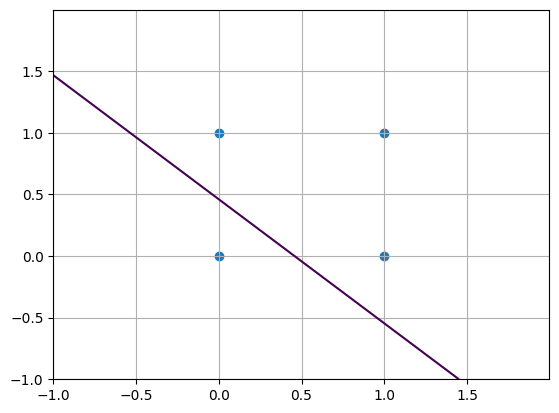

In [35]:
import matplotlib.pyplot as plt
import numpy as np

delta = 0.002
xrange = np.arange(-1.0, 2.0, delta)
yrange = np.arange(-1.0, 2.0, delta)
X, Y = np.meshgrid(xrange,yrange)

plt.contour(X, Y, param_pt[0][0,0]*X + param_pt[0][0,1]*Y + np.array(param_pt[1]), [0])
plt.scatter([0,0,1,1], [0,1,0,1])
plt.grid('both')
plt.show()
display(HTML("Decision Boundary for the pyTorch Model"))

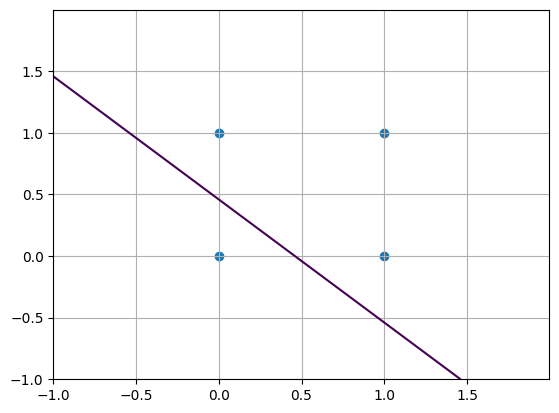

In [36]:
plt.contour(X, Y, param_tf[0][0,0]*X + param_tf[0][1,0]*Y + np.array(param_tf[1]), [0])
plt.scatter([0,0,1,1], [0,1,0,1])
plt.grid('both')
plt.show()
display(HTML("Decision Boundary for the Tensorflow Model"))

## How about an `xor` gate?

At this point you might be wondering about how the neuron will perform for an xor gate. There is no straight line in the 2-d space that can separate the positive classes from the negative in this case. Long ago, MIT Professor [Marvin Minsky](https://en.wikipedia.org/wiki/Marvin_Minsky) challenged the work of [Frank Rosenblatt](https://en.wikipedia.org/wiki/Frank_Rosenblatt) on the basis on this very problem and caused an AI winter. Fortunately, now we know the solution. It is true that this problem is not solvable by a single neuron. But we can arbitrarily increase the number of neurons (By either using more `Dense` (Tensorflow) or `Linear` (pyTorch) layers, or by setting the output of the `Dense`/`Linear` layers to more than 1). In that way, the decision surface doesn't have to be a straight line. By arbitrarily increasing the number of neurons (e.g. the number of model parameters), it is possible to make the dicision surface arbitrarily distorted. Try playing with the number of neurons in the [neural network playground for this problem](https://playground.tensorflow.org/#activation=sigmoid&batchSize=10&dataset=xor&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=1&seed=0.26802&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false).